In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

In [2]:
train = pd.read_csv('ad_org_train.csv')
test = pd.read_csv('ad_org_test.csv')

In [24]:
train.head()

,vidid,adview,views,likes,dislikes,comment,category,Hours,minu,seco,Total Time,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,18655,40,1031602,8523,363,1095,5,0,7,37,457,2016,9,14,2,258,37,3
1,14135,2,1707,56,2,6,3,0,9,30,570,2016,10,1,5,275,39,4
2,2187,1,2023,25,0,2,2,0,2,16,136,2016,7,2,5,184,26,3
3,23096,6,620860,777,161,153,7,0,4,22,262,2016,7,27,2,209,30,3
4,10175,1,666,1,0,0,3,0,0,31,31,2016,6,29,2,181,26,2


In [16]:
from sklearn.preprocessing import LabelEncoder
cols = ['category']
for x in cols:
    lbl = LabelEncoder()
    train[x] = lbl.fit_transform(train[x])

# Feature Engineering

In [18]:
import re 


LIST = []
for i in train['duration']:
    LIST.append(re.findall('\d+',i))

LIST1 = []
for i in train['vidid']:
    LIST1.append(re.findall('\d+',i))
LIST1 = [j for sub in LIST1 for j in sub]
train['vidid'] = LIST1

In [20]:
minu = []
hour = []
seco = []
null = 0

for j,i in enumerate(LIST):
    if len(i)==3:
        hour.append(i[-3])
        minu.append(i[-2])
        seco.append(i[-1])
        
    elif len(i)==2:
        hour.append(null)
        minu.append(i[-2])
        seco.append(i[-1])
        
    elif len(i)==1:
        hour.append(null)
        minu.append(null)
        seco.append(i[-1])

In [21]:
train['Hours'] = hour
train['minu'] = minu
train['seco'] = seco

train['Hours'] = train['Hours'].astype(int)
train['minu'] = train['minu'].astype(int)
train['seco'] = train['seco'].astype(int)
train['vidid'] = train['vidid'].astype(int)

train.drop('duration',axis=1,inplace=True)

train['Total Time'] = train['Hours']*60*60 + train['minu']*60 + train['seco']

## Date Extraction

In [23]:
from datetime import datetime,date

train['published'] = pd.to_datetime(train['published'])
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']

train = train.join(pd.concat((getattr(train['published'].dt, i).rename(i) for i in L), axis=1))

train.drop('published',axis=1,inplace=True)

In [25]:
for indx,i in enumerate(train.views):
    if i=='F' :
        train['views'][indx] = train['views'].mode()[0]
for indx,i in enumerate(train.likes):
    if i=='F' :
        train['likes'][indx] = train['likes'].mode()[0]
        
for indx,i in enumerate(train.dislikes):
    if i=='F' :
        train['dislikes'][indx] = train['dislikes'].mode()[0]
        
for indx,i in enumerate(train.comment):
    if i=='F' :
        train['comment'][indx] = train['comment'].mode()[0]


C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\De

In [26]:
train['views'] = train['views'].astype(int)
train['likes'] = train['likes'].astype(int)
train['dislikes'] = train['dislikes'].astype(int)
train['comment'] = train['comment'].astype(int)

# Final Dateset

In [27]:
train.head()

,vidid,adview,views,likes,dislikes,comment,category,Hours,minu,seco,Total Time,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,18655,40,1031602,8523,363,1095,5,0,7,37,457,2016,9,14,2,258,37,3
1,14135,2,1707,56,2,6,3,0,9,30,570,2016,10,1,5,275,39,4
2,2187,1,2023,25,0,2,2,0,2,16,136,2016,7,2,5,184,26,3
3,23096,6,620860,777,161,153,7,0,4,22,262,2016,7,27,2,209,30,3
4,10175,1,666,1,0,0,3,0,0,31,31,2016,6,29,2,181,26,2


## Analysis

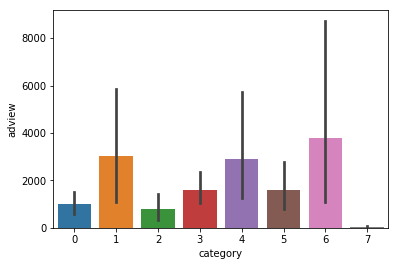

In [28]:
sns.barplot(x='category',y='adview',data=train)

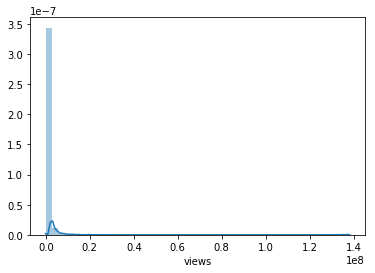

In [29]:
sns.distplot(train['views'])

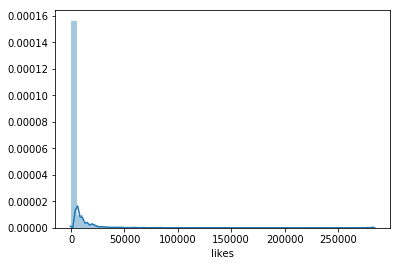

In [30]:
sns.distplot(train['likes'])

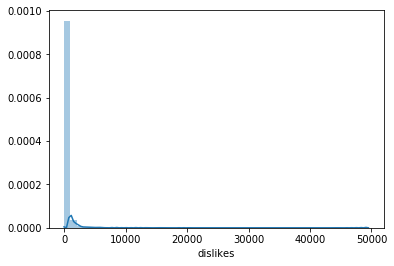

In [31]:
sns.distplot(train['dislikes'])

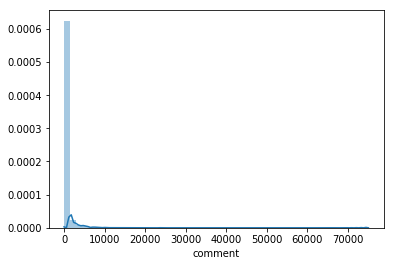

In [32]:
sns.distplot(train['comment'])

### Here we find that our data is highly skewed. To reduce skewness we will use scaling and log transformation in our modelling process.

In [6]:
#train.info()

In [7]:
#test.info()

In [8]:
#train.isnull().sum()

In [9]:
#test.isnull().sum()

In [10]:
train.shape

(14999, 9)

In [11]:
test.shape

(8764, 8)

In [ ]:
y = train['adview']
train.drop(['adview'],axis=1,inplace=True)
#test.drop('vidid',axis=1,inplace=True)

In [ ]:
r, c = train.shape
all_data = pd.concat([train,test])
all_data.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['category']
for x in cols:
    lbl = LabelEncoder()
    all_data[x] = lbl.fit_transform(all_data[x])

In [ ]:
all_data.head()

In [ ]:
import re 

LIST1 = [j for sub in LIST1 for j in sub]

LIST = []
for i in all_data['duration']:
    LIST.append(re.findall('\d+',i))

LIST1 = []
for i in all_data['vidid']:
    LIST1.append(re.findall('\d+',i))
LIST1 = [j for sub in LIST1 for j in sub]
all_data['vidid'] = LIST1

In [ ]:
minu = []
hour = []
seco = []
null = 0

for j,i in enumerate(LIST):
    if len(i)==3:
        hour.append(i[-3])
        minu.append(i[-2])
        seco.append(i[-1])
        
    elif len(i)==2:
        hour.append(null)
        minu.append(i[-2])
        seco.append(i[-1])
        
    elif len(i)==1:
        hour.append(null)
        minu.append(null)
        seco.append(i[-1])

In [ ]:
all_data['Hours'] = hour
all_data['minu'] = minu
all_data['seco'] = seco

all_data['Hours'] = all_data['Hours'].astype(int)
all_data['minu'] = all_data['minu'].astype(int)
all_data['seco'] = all_data['seco'].astype(int)
all_data['vidid'] = all_data['vidid'].astype(int)

all_data.drop('duration',axis=1,inplace=True)

all_data['Total Time'] = all_data['Hours']*60*60 + all_data['minu']*60 + all_data['seco']

In [ ]:
all_data.head()

In [ ]:
from datetime import datetime,date

all_data['published'] = pd.to_datetime(all_data['published'])
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']

all_data = all_data.join(pd.concat((getattr(all_data['published'].dt, i).rename(i) for i in L), axis=1))

all_data.drop('published',axis=1,inplace=True)

In [ ]:
all_data.head()

In [ ]:
for indx,i in enumerate(all_data.views):
    if i=='F' :
        all_data['views'][indx] = all_data['views'].mode()[0]
for indx,i in enumerate(all_data.likes):
    if i=='F' :
        all_data['likes'][indx] = all_data['likes'].mode()[0]
        
for indx,i in enumerate(all_data.dislikes):
    if i=='F' :
        all_data['dislikes'][indx] = all_data['dislikes'].mode()[0]
        
for indx,i in enumerate(all_data.comment):
    if i=='F' :
        all_data['comment'][indx] = all_data['comment'].mode()[0]


In [ ]:
all_data['views'] = all_data['views'].astype(int)
all_data['likes'] = all_data['likes'].astype(int)
all_data['dislikes'] = all_data['dislikes'].astype(int)
all_data['comment'] = all_data['comment'].astype(int)

In [ ]:
X_Train = all_data[:r]
X_Test = all_data[r:]

In [ ]:
X_Train.to_csv('FINAL.csv',index=False)

In [ ]:
X_Test.to_csv('FINAL_test.csv',index=False)